In [1]:
print('Hello World!')

Hello World!


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

#Collecting files for later importing

path = r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\Datasets'''
filenames = list(glob.glob(path + "\*.csv"))
file = filenames[0]

BTC_df = pd.read_csv(file)
BTC_df.columns = ['Date', BTC_df.columns[1]+"_"+file[-9:-4]]
for file in filenames[1:]:
    load = pd.read_csv(file)
    load.columns = ['Date', load.columns[1]+"_"+file[-9:-4]]
    BTC_df = pd.merge(BTC_df, load, on='Date')

print(BTC_df.head())
print(BTC_df.tail())

         Date  Value_AVBLS  Value_MKPRU  Value_MWNTD  Value_MWNUS  \
0  2017-12-06         1.05     11878.43      82967.0   19746602.0   
1  2017-12-05         1.06     11584.82      95492.0   19682034.0   
2  2017-12-04         1.04     11332.62      82178.0   19610796.0   
3  2017-12-03         1.03     11071.36      66294.0   19546323.0   
4  2017-12-02         1.06     10883.91      98564.0   19503068.0   

   Value_NADDU  Value_NTRAN  Value_NTRAT  Value_NTRBL  
0     891235.0     405709.0  278526499.0      2279.26  
1     885109.0     400686.0  278120790.0      2213.73  
2     762992.0     353044.0  277720104.0      2005.93  
3     683882.0     326354.0  277367060.0      2027.04  
4     869274.0     412908.0  277040706.0      2256.32  
            Date  Value_AVBLS  Value_MKPRU  Value_MWNTD  Value_MWNUS  \
3233  2009-01-07     0.000000          0.0          0.0          2.0   
3234  2009-01-06     0.000000          0.0          0.0          2.0   
3235  2009-01-05     0.000000    

In [45]:
#reseting index to date-time
BTC_df.set_index('Date', drop=True)

,Value_AVBLS,Value_MKPRU,Value_MWNTD,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL
Date,,,,,,,,
2017-12-06,1.050000,11878.43,82967.0,19746602.0,891235.0,405709.0,278526499.0,2279.26
2017-12-05,1.060000,11584.82,95492.0,19682034.0,885109.0,400686.0,278120790.0,2213.73
2017-12-04,1.040000,11332.62,82178.0,19610796.0,762992.0,353044.0,277720104.0,2005.93
2017-12-03,1.030000,11071.36,66294.0,19546323.0,683882.0,326354.0,277367060.0,2027.04
2017-12-02,1.060000,10883.91,98564.0,19503068.0,869274.0,412908.0,277040706.0,2256.32
2017-12-01,1.060000,10147.37,101161.0,19430457.0,851419.0,384386.0,276627798.0,2301.71
2017-11-30,1.060000,9879.32,75102.0,19373676.0,903004.0,398090.0,276243412.0,2301.09
2017-11-29,1.060000,9952.50,80874.0,19261417.0,816744.0,365977.0,275845322.0,2346.00
2017-11-28,1.040000,9718.29,77678.0,19215073.0,829650.0,379256.0,275479345.0,2230.91


In [55]:
BTC_df.mean()

Value_NTRBL    5.580356e+02
Value_NTRAT    5.471734e+07
Value_NTRAN    8.449874e+04
Value_NADDU    1.575536e+05
Value_MWNUS    3.022266e+06
Value_MWNTD    2.362076e+04
Value_MKPRU    4.810325e+02
Value_AVBLS    2.853172e-01
dtype: float64

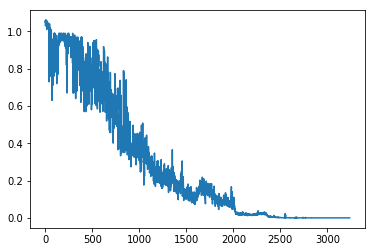

In [52]:
plt.plot(BTC_df['Value_AVBLS'], label='Average Block Size')
plt.show()
#AVG Block Size is 0.28

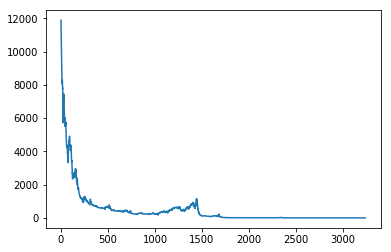

In [50]:
plt.plot(BTC_df['Value_MKPRU'], label='Bitcoin Daily Market Price')
plt.show()